In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

data = pd.read_parquet('/content/drive/My Drive/BA870_group/final_data/data_rmerged.parquet')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from IPython.display import display

def peek(df: pd.DataFrame, name: str = "", n: int = 5):
    """快速透视 DataFrame."""
    print(f"\n===== {name} =====")
    print(f"shape: {df.shape}")
    print("dtypes:")
    print(df.dtypes.value_counts())
    print("\nnull %:")
    print((df.isna().mean()*100).round(2).sort_values(ascending=False).head(10))
    print("\nhead:")
    display(df.head(n))

    core_cols = [c for c in ["ticker", "date", "VOL"] if c in df.columns]
    if core_cols:
        print(f"\n核心列预览 {core_cols}:")
        display(df[core_cols].head(n))
    print("="*40)


In [ ]:
data.head()

,date,ticker,PRC,VOL,Log_Return,Volatility_5d,Log_Volume,Volume_MA_Log,Volume_MA5,Momentum,...,capei,gpm,npm,roa,roe,capital_ratio,de_ratio,quick_ratio,inv_turn,distcd
0,2021-02-01,A,120.83,1292732.0,0.005477,0.024194,14.072269,14.299136,1638545.4,-4.65,...,56.694594,0.574639,0.134669,0.140364,0.148615,0.330999,0.975580,1.837082,3.246605,NaN
1,2021-02-01,AAPL,134.14,106188262.0,0.016385,0.023715,18.480724,18.685542,133370916.4,-8.78,...,41.605141,0.417668,0.209136,0.229431,0.696621,0.620977,3.957039,1.325072,39.147545,NaN
2,2021-02-01,ABBV,102.30,7518153.0,-0.001758,0.026229,15.832831,15.933548,8575066.8,-8.20,...,29.484747,0.835097,0.181664,0.200275,0.291643,0.952854,32.314016,1.661066,2.394996,NaN
3,2021-02-01,ABT,122.54,8337131.0,-0.008532,0.025543,15.936230,15.930060,8775207.0,7.82,...,108.559640,0.607275,0.104342,0.115391,0.107372,0.364663,1.203553,1.085131,2.631043,NaN
4,2021-02-01,ADBE,470.00,2516663.0,0.024184,0.023412,14.738445,14.867615,2895092.4,-3.44,...,80.356278,0.897031,0.408766,0.212936,0.439347,0.258166,0.830820,1.477866,0.000000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425395 entries, 0 to 425394
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               425395 non-null  datetime64[ns]
 1   ticker                             425395 non-null  object        
 2   PRC                                425395 non-null  float64       
 3   VOL                                425395 non-null  float64       
 4   Log_Return                         425395 non-null  float64       
 5   Volatility_5d                      425395 non-null  float64       
 6   Log_Volume                         425395 non-null  float64       
 7   Volume_MA_Log                      425395 non-null  float64       
 8   Volume_MA5                         425395 non-null  float64       
 9   Momentum                           425395 non-null  float64       
 10  sentiment_score     

In [ ]:
data = data.drop(columns=['gvkey_fund', 'permno_fund', 'VOL', 'Volume_MA5', 'Log_Volume', 'Volume_MA_Log'])

In [ ]:
peek(data, "Raw input")
assert pd.api.types.is_datetime64_any_dtype(data['date']), "date 列应为 datetime"
assert data['Volatility_5d'].notna().all(), "VOL 不应含缺失"



===== Raw input =====
shape: (425395, 30)
dtypes:
float64           28
datetime64[ns]     1
object             1
Name: count, dtype: int64

null %:
distcd               98.81
execid               95.93
sentiment_score      15.39
Log_Return            0.00
PRC                   0.00
date                  0.00
Momentum              0.00
GDP                   0.00
CPI                   0.00
Unemployment Rate     0.00
dtype: float64

head:


,date,ticker,PRC,Log_Return,Volatility_5d,Momentum,sentiment_score,GDP,CPI,Unemployment Rate,...,capei,gpm,npm,roa,roe,capital_ratio,de_ratio,quick_ratio,inv_turn,distcd
0,2021-02-01,A,120.83,0.005477,0.024194,-4.65,NaN,0.0,263.573,6.2,...,56.694594,0.574639,0.134669,0.140364,0.148615,0.330999,0.975580,1.837082,3.246605,NaN
1,2021-02-01,AAPL,134.14,0.016385,0.023715,-8.78,NaN,0.0,263.573,6.2,...,41.605141,0.417668,0.209136,0.229431,0.696621,0.620977,3.957039,1.325072,39.147545,NaN
2,2021-02-01,ABBV,102.30,-0.001758,0.026229,-8.20,NaN,0.0,263.573,6.2,...,29.484747,0.835097,0.181664,0.200275,0.291643,0.952854,32.314016,1.661066,2.394996,NaN
3,2021-02-01,ABT,122.54,-0.008532,0.025543,7.82,NaN,0.0,263.573,6.2,...,108.559640,0.607275,0.104342,0.115391,0.107372,0.364663,1.203553,1.085131,2.631043,NaN
4,2021-02-01,ADBE,470.00,0.024184,0.023412,-3.44,NaN,0.0,263.573,6.2,...,80.356278,0.897031,0.408766,0.212936,0.439347,0.258166,0.830820,1.477866,0.000000,NaN



核心列预览 ['ticker', 'date']:


,ticker,date
0,A,2021-02-01
1,AAPL,2021-02-01
2,ABBV,2021-02-01
3,ABT,2021-02-01
4,ADBE,2021-02-01


In [ ]:
import torch
from torch.utils.data import Dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from typing import Dict, List, Optional, Tuple


# ------- 1⃣️  all ---------
def fit_feature_tools(
        train_df: pd.DataFrame,
        num_features: List[str],
        cat_cols: List[str],
        sentiment_col: str,
        target_col: str
) -> Tuple[StandardScaler, StandardScaler, OrdinalEncoder]:
       scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # 1) 数值 + sentiment 统一做 z-score
    scaler_X.fit(train_df[num_features + [sentiment_col]])

    # 2) 目标列
    scaler_y.fit(train_df[[target_col]])

    # 3) 分类列：输出 int64 便于 Embedding
    encoder = OrdinalEncoder(
        handle_unknown="use_encoded_value",
        unknown_value=-1
    )
    encoder.fit(train_df[cat_cols])

    return scaler_X, scaler_y, encoder


# ------- 2⃣️  Dataset ---------
class StockDatasetV2(Dataset):

    def __init__(
        self,
        df: pd.DataFrame,
        time_steps: int = 10,
        stride: int = 1,
        stock_col: str = 'ticker',
        date_col: str = 'date',
        target_col: str = 'Volatility_5d',
        sentiment_col: str = 'sentiment_score',
        cat_cols: List[str] = ['execid', 'distcd'],
        scaler_X: Optional[StandardScaler] = None,
        scaler_y: Optional[StandardScaler] = None,
        encoder: Optional[OrdinalEncoder] = None,
    ):
        assert scaler_X is not None and scaler_y is not None and encoder is not None, \


        self.T = time_steps
        self.stride = stride
        self.stock_col = stock_col
        self.date_col = date_col
        self.target_col = target_col
        self.sentiment_col = sentiment_col
        self.cat_cols = cat_cols
        self.scaler_X = scaler_X
        self.scaler_y = scaler_y
        self.encoder = encoder
        self.meta = []

        # ---------- preprocess ----------
        self.num_features = [
            c for c in df.columns
            if c not in [stock_col, date_col, target_col, sentiment_col] + cat_cols
        ]
        self.all_features = (
            self.num_features +
            [sentiment_col] +
            cat_cols
        )

        self.X, self.y = self._build_windows(df.copy())

    # ----------------------------------------------
    #                core def
    # ----------------------------------------------
    def _build_windows(self, df: pd.DataFrame):
        X_seq, y_seq = [], []

        # ---- null process ----
        for col in self.num_features:
            df[col] = df.groupby(self.stock_col)[col].transform(
                lambda x: x.fillna(x.median())
            ).fillna(0)

        df[self.sentiment_col] = (
            df.groupby(self.stock_col)[self.sentiment_col]
              .transform(lambda x: x.fillna(x.mean()))
              .fillna(df[self.sentiment_col].mean())
        )

        for col in self.cat_cols:
            df[col] = df[col].fillna('UNK')


        # ---- standarlization, embedding ----
        df[self.num_features + [self.sentiment_col]] = \
            self.scaler_X.transform(df[self.num_features + [self.sentiment_col]])

        df[self.cat_cols] = self.encoder.transform(df[self.cat_cols]).astype('int64')
        # ---- insert meta data ----
        X_seq, y_seq = [], []
        for _, g in df.groupby(self.stock_col):
          g_sorted = g.sort_values(self.date_col)

          feats = g_sorted[self.all_features].values
          tgt   = self.scaler_y.transform(g_sorted[[self.target_col]]).flatten()

          for i in range(0, len(g_sorted) - self.T, self.stride):
              X_seq.append(feats[i:i + self.T])
              y_seq.append(tgt[i + self.T])

              # ----- meta-----
              self.meta.append({
                  'ticker': g_sorted[self.stock_col].iloc[i],
                  'start_date': g_sorted[self.date_col].iloc[i],
                  'target_date': g_sorted[self.date_col].iloc[i + self.T],
              })
        # ---- moving window ----
        for _, g in df.groupby(self.stock_col):
            g_sorted = g.sort_values(self.date_col)

            feats = g_sorted[self.all_features].values
            tgt   = self.scaler_y.transform(g_sorted[[self.target_col]]).flatten()

            for i in range(0, len(g_sorted) - self.T, self.stride):
                X_seq.append(feats[i:i + self.T])
                y_seq.append(tgt[i + self.T])

        X_tensor = torch.tensor(X_seq, dtype=torch.float32)
        y_tensor = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(1)
        return X_tensor, y_tensor

    # ----------- Dataset API -----------
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx: int):
        return self.X[idx], self.y[idx]


In [ ]:
def recover_batch(dataset: StockDatasetV2, index=0):

    X_seq, y = dataset[index]
    X_seq = X_seq.numpy()
    y = y.item()

    meta = dataset.meta[index]

    # --- split ---
    num_cont_cols = dataset.num_features + [dataset.sentiment_col]
    cat_cols = dataset.cat_cols

    num_feat_dim = len(num_cont_cols)
    cat_feat_dim = len(cat_cols)

    X_cont = X_seq[:, :num_feat_dim]
    X_cat = X_seq[:, num_feat_dim:]

    # --- inverse ---
    X_cont_inv = dataset.scaler_X.inverse_transform(X_cont)

    # --- inverse embedding ---
    X_cat_inv = dataset.encoder.inverse_transform(X_cat)

    # ---  DataFrame ---
    df_cont = pd.DataFrame(X_cont_inv, columns=num_cont_cols)
    df_cat = pd.DataFrame(X_cat_inv, columns=cat_cols)

    df_recovered = pd.concat([df_cont, df_cat], axis=1)

    # ---  ticker and date ---
    df_recovered['ticker'] = meta['ticker']
    df_recovered['start_date'] = meta['start_date']
    df_recovered['step'] = range(len(df_recovered))
    df_recovered['target_date'] = meta['target_date']

    # --- inverse ---
    y_inv = dataset.scaler_y.inverse_transform([[y]])[0, 0]




In [ ]:
import torch.nn as nn


class LSTMVolumePredictor(nn.Module):


    def __init__(self,
                 input_size: int,
                 hidden_size: int = 64,
                 num_layers: int = 1,
                 dropout: float = 0.0):
        super().__init__()


        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0
        )


        self.fc = nn.Linear(hidden_size, 1)

        self._reset_parameters()

    def _reset_parameters(self):

        for name, param in self.lstm.named_parameters():
            if "weight" in name:
                nn.init.xavier_uniform_(param)
            elif "bias" in name:
                nn.init.zeros_(param)
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.zeros_(self.fc.bias)

    # ----------------------- forward send -----------------------
    def forward(self, x):
        # x: (batch, time_steps, input_size)

        _, (hn, _) = self.lstm(x)        # hn: (num_layers, batch, hidden)
        last_hidden = hn[-1]             # (batch, hidden_size)

        return self.fc(last_hidden)      # (batch, 1)


In [ ]:
import torch
from torch.utils.data import DataLoader
import pandas as pd


# 1.  80/20
data = data.sort_values("date").reset_index(drop=True)
cut = int(len(data) * 0.8)
train_df = data.iloc[:cut]
test_df  = data.iloc[cut:]

# 2.  scaler / encoder
num_cols = [c for c in train_df.columns
            if c not in ["ticker", "date", "Volatility_5d", "sentiment_score", "execid", "distcd"]]

scaler_X, scaler_y, encoder = fit_feature_tools(
    train_df,
    num_features=num_cols,
    cat_cols=["execid", "distcd"],
    sentiment_col="sentiment_score",
    target_col="Volatility_5d")


# 3.  Dataset
TIME_STEPS = 10
STRIDE     = 5

train_set = StockDatasetV2(train_df, TIME_STEPS, STRIDE,
                           scaler_X=scaler_X, scaler_y=scaler_y, encoder=encoder)
test_set  = StockDatasetV2(test_df,  TIME_STEPS, STRIDE,
                           scaler_X=scaler_X, scaler_y=scaler_y, encoder=encoder)

# 4. DataLoader
BATCH = 32
train_loader = DataLoader(train_set, batch_size=BATCH, shuffle=False, drop_last=True)
test_loader  = DataLoader(test_set,  batch_size=BATCH, shuffle=False)

<ipython-input-13-6c498d5ed9bc>:145: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X_tensor = torch.tensor(X_seq, dtype=torch.float32)


In [ ]:
def inspect_batch(loader, dataset, idx_in_batch: int = 0):

    X_b, y_b = next(iter(loader))
    X_seq = X_b[idx_in_batch].cpu().numpy()
    y_val = y_b[idx_in_batch].item()


    df_seq = pd.DataFrame(X_seq, columns=dataset.all_features)

    print(f"\nTARGET VOL (scaled)  : {y_val:.4f}")
    print(f"sequence shape       : {X_seq.shape}")
    display(df_seq.head())

    return df_seq

In [ ]:
pd.set_option('display.max_columns', 100)
inspect_batch(train_loader, train_set, idx_in_batch=0)


TARGET VOL (scaled)  : -0.4594
sequence shape       : (10, 27)


,PRC,Log_Return,Momentum,GDP,CPI,Unemployment Rate,Federal Funds Rate,Personal Consumption Expenditures,Industrial Production,Retail Sales,M2 Money Stock,VIX,TED Spread,bm,divyield,capei,gpm,npm,roa,roe,capital_ratio,de_ratio,quick_ratio,inv_turn,sentiment_score,execid,distcd
0,-0.208327,0.183098,-0.176222,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,-0.181179,-1.0,-1.0
1,-0.201918,0.673887,-0.037995,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0
2,-0.204742,-0.310848,0.105873,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0
3,-0.199529,0.541256,0.076253,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0
4,-0.201946,-0.265583,0.093884,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0


,PRC,Log_Return,Momentum,GDP,CPI,Unemployment Rate,Federal Funds Rate,Personal Consumption Expenditures,Industrial Production,Retail Sales,M2 Money Stock,VIX,TED Spread,bm,divyield,capei,gpm,npm,roa,roe,capital_ratio,de_ratio,quick_ratio,inv_turn,sentiment_score,execid,distcd
0,-0.208327,0.183098,-0.176222,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,-0.181179,-1.0,-1.0
1,-0.201918,0.673887,-0.037995,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0
2,-0.204742,-0.310848,0.105873,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0
3,-0.199529,0.541256,0.076253,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0
4,-0.201946,-0.265583,0.093884,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0
5,-0.201321,0.055260,0.078722,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0
6,-0.201783,-0.059558,-0.010491,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0
7,-0.196787,0.513781,0.091063,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,0.782423,-1.0,-1.0
8,-0.191682,0.517274,0.089653,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,-1.580340,-1.0,-1.0
9,-0.188912,0.272461,0.157003,-0.66878,-1.919276,2.44211,-1.090338,-2.343227,-3.499771,-3.192334,-2.732015,0.651026,1.997742,-0.590501,-0.673639,0.042371,0.497852,0.066024,-0.034494,-0.09519,-0.134767,-0.008034,0.567936,-0.032599,-1.580340,-1.0,-1.0


In [ ]:

valid_df  = train_df.iloc[int(len(train_df)*0.9):]   #  10 %
train_df  = train_df.iloc[:int(len(train_df)*0.9)]   #  90 %

# ——  Dataset  DataLoader
valid_set   = StockDatasetV2(valid_df, TIME_STEPS, STRIDE,
                             scaler_X=scaler_X, scaler_y=scaler_y, encoder=encoder)
valid_loader = DataLoader(valid_set, batch_size=BATCH*4, shuffle=False)


In [ ]:
import torch
import torch.nn as nn

# ---------- 0. device ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------- 1. model ----------
input_size = train_set.X.shape[2]
model = LSTMVolumePredictor(
    input_size=input_size,
    hidden_size=64,
    num_layers=2,
    # dropout=0.0,
).to(device)

criterion  = nn.MSELoss()
optimizer  = torch.optim.Adam(model.parameters(), lr=1e-3)

# ---------- 2. train loop ----------
EPOCHS      = 20
best_val    = float("inf")

for epoch in range(1, EPOCHS + 1):
    # ----- 2-A train -----
    model.train()
    running_loss = 0.0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        preds = model(X)
        loss  = criterion(preds, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X.size(0)

    train_loss = running_loss / len(train_loader.dataset)

    # ----- 2-B valid -----
    model.eval()
    with torch.no_grad():
        val_loss_sum = 0.0
        for Xv, yv in valid_loader:
            Xv, yv = Xv.to(device), yv.to(device)
            pv     = model(Xv)
            val_loss_sum += criterion(pv, yv).item() * Xv.size(0)

    val_loss = val_loss_sum / len(valid_loader.dataset)

    # ----- 2-C log -----
    if val_loss < best_val:
        best_val = val_loss
        torch.save(model.state_dict(), "best_lstm.pt")

    print(f"Epoch {epoch:02d}/{EPOCHS} | "
          f"train_loss = {train_loss:.6f} | "
          f"val_loss = {val_loss:.6f}")





Epoch 01/20 | train_loss = 0.497974 | val_loss = 0.133897
Epoch 02/20 | train_loss = 0.315542 | val_loss = 0.092933
Epoch 03/20 | train_loss = 0.273463 | val_loss = 0.073934
Epoch 04/20 | train_loss = 0.214487 | val_loss = 0.061981
Epoch 05/20 | train_loss = 0.174514 | val_loss = 0.062775
Epoch 06/20 | train_loss = 0.140661 | val_loss = 0.056817
Epoch 07/20 | train_loss = 0.127349 | val_loss = 0.063302
Epoch 08/20 | train_loss = 0.155937 | val_loss = 0.059467
Epoch 09/20 | train_loss = 0.098401 | val_loss = 0.073856
Epoch 10/20 | train_loss = 0.090282 | val_loss = 0.075040
Epoch 11/20 | train_loss = 0.111823 | val_loss = 0.060814
Epoch 12/20 | train_loss = 0.091454 | val_loss = 0.056344
Epoch 13/20 | train_loss = 0.075997 | val_loss = 0.055823
Epoch 14/20 | train_loss = 0.083552 | val_loss = 0.060172
Epoch 15/20 | train_loss = 0.065479 | val_loss = 0.053665
Epoch 16/20 | train_loss = 0.059911 | val_loss = 0.053514
Epoch 17/20 | train_loss = 0.077278 | val_loss = 0.052338
Epoch 18/20 | 


=== Test Metrics (inverse-scaled) ===
MSE  : 0.000165
RMSE : 0.012864
MAE  : 0.003945
MAPE : 5452028.91%
SMAPE: 27.78%
R²   : 0.7724


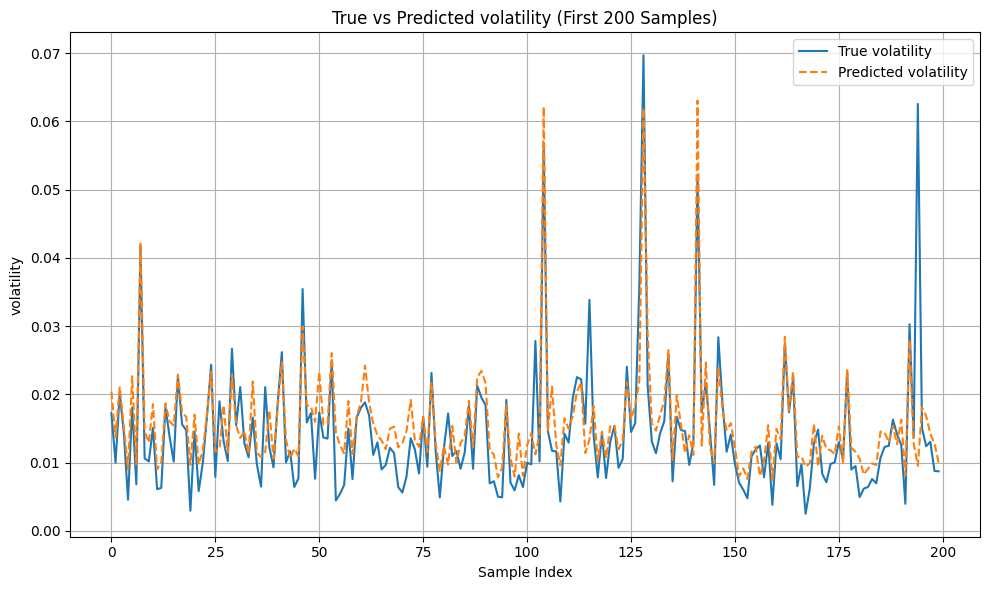

In [ ]:
# ===== Step 5  =====
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                             mean_absolute_percentage_error, r2_score)


model.load_state_dict(torch.load("best_lstm.pt", map_location=device))
model.eval()


y_true_lst, y_pred_lst = [], []

with torch.no_grad():
    for Xb, yb in test_loader:               # test_loader
        Xb = Xb.to(device)
        preds = model(Xb).cpu()              # (batch, 1)

        y_true_lst.append(yb)
        y_pred_lst.append(preds)

y_true = torch.cat(y_true_lst).numpy()       # shape (N, 1)
y_pred = torch.cat(y_pred_lst).numpy()


y_true_inv = scaler_y.inverse_transform(y_true)
y_pred_inv = scaler_y.inverse_transform(y_pred)


mse  = mean_squared_error(y_true_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_true_inv, y_pred_inv) * 100
r2   = r2_score(y_true_inv, y_pred_inv)

def smape(y_t, y_p):
    denom = (np.abs(y_t) + np.abs(y_p)) / 2.0
    denom = np.where(denom == 0, 1e-8, denom)
    return np.mean(np.abs(y_t - y_p) / denom) * 100

smape_val = smape(y_true_inv, y_pred_inv)

print("\n=== Test Metrics (inverse-scaled) ===")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"MAPE : {mape:.2f}%")
print(f"SMAPE: {smape_val:.2f}%")
print(f"R²   : {r2:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(y_true_inv[:200], label='True volatility')
plt.plot(y_pred_inv[:200], label='Predicted volatility', linestyle='--')
plt.title('True vs Predicted volatility (First 200 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import torch
import pickle

# 假设你的模型名字叫 `model`
# 先保存 state_dict
model_path = "/content/drive/My Drive/BA870_group/final_data/lstm_volatility_model.pkl"

# 保存整个模型
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"整个模型已保存为 {model_path}")



整个模型已保存为 /content/drive/My Drive/BA870_group/final_data/lstm_volatility_model.pkl
